# Assignment #3

Team: <br>
LASRI Mouad 2021021597 <br>
GEMEDA Metasebia 2020010593

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(42)

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import collections

%matplotlib inline

In [3]:
from datetime import datetime as dt
import scipy as sc
import random

In [4]:
def makeData(N=256, numimg=2, M=8, numfilt=3, seed=42):
    np.random.seed(seed)
    I = np.random.rand(N, N, numimg)
    F = np.random.rand(M, M, numfilt)
    O = np.zeros((N, N, numimg, numfilt))
    return I, F, O

In [5]:
image_data, filter_data, output_data = makeData() 

In [6]:
def c2d(I,F,O):
    for im in range(len(I[0,0])):
        for fi in range(len(F[0,0])):
            img = I[:,:,im]
            fil = F[:,:,fi]
            O[:,:,im,fi]=sc.signal.convolve2d(img,fil,mode='same', boundary='fill', fillvalue=0)
    return O

In [10]:
def c2dfft(I,F,O):
    for im in range(len(I[0,0])):
        for fi in range(len(F[0,0])):
            img = I[:,:,im]
            fil = F[:,:,fi]
            O[:,:,im,fi]=sc.signal.fftconvolve(img,fil,mode='same')
    return O

In [11]:
st1 =  dt.timestamp(dt.now())
O1 = c2d(image_data, filter_data, output_data)
#et1= dt.time()
elapsed_time1 =  dt.timestamp(dt.now())- st1
print('Execution time:', elapsed_time1, 'seconds')

Execution time: 0.10045194625854492 seconds


In [12]:
st2 = dt.timestamp(dt.now())
O2 = c2dfft(image_data, filter_data, output_data)
#et2= dt.time() 
elapsed_time2 = dt.timestamp(dt.now())- st2
print('Execution time:', elapsed_time2, 'seconds')

Execution time: 0.057138919830322266 seconds


In [13]:
elapsed_time_conv = np.zeros([30,1])
elapsed_time_fft = np.zeros([30,1])
for i in range(30):
    seed_int =random.randint(0, 1000) # creating random seed values for 20 different datasets
    image_data, filter_data, output_data = makeData(N=256, numimg=2, M=1+i, numfilt=3, seed=seed_int) # M--> filter size from 1 to 20
    
    
    #finding execution time for function c2d
    
    st1 =  dt.timestamp(dt.now()) # using datetime's timestam function to create starting point of execution
    O1 = c2d(image_data, filter_data, output_data)
    elapsed_time_conv[i] =  dt.timestamp(dt.now())- st1 # duration of execution
    
    
    #finding execution time for function c2dfft
    st2 =  dt.timestamp(dt.now())
    O2 = c2dfft(image_data, filter_data, output_data)
    elapsed_time_fft[i] =  dt.timestamp(dt.now())- st2    

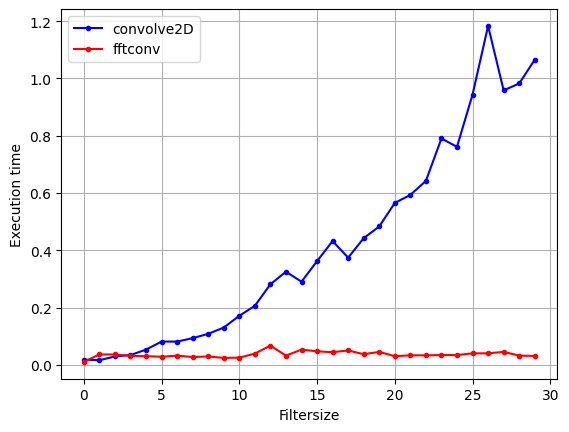

In [14]:
plt.plot(elapsed_time_conv,'b.-')
plt.plot(elapsed_time_fft,'r.-')
plt.xlabel('Filtersize')
plt.ylabel('Execution time')
plt.legend(['convolve2D', 'fftconv'])
plt.grid()


It seems that the fft convolve becomes faster than the convolve2D function after M=4. The convolve 2D's execution time increases in somhow exponential manner with filter size. But the FFT convolution execution time is unaffected maorely by the filter size

In [15]:
for i in range(30):
    print('Execution time for convolve2D with filter size M=', i+1, 'is',elapsed_time_conv[i] )

Execution time for convolve2D with filter size M= 1 is [0.01899099]
Execution time for convolve2D with filter size M= 2 is [0.01700521]
Execution time for convolve2D with filter size M= 3 is [0.02998018]
Execution time for convolve2D with filter size M= 4 is [0.03498006]
Execution time for convolve2D with filter size M= 5 is [0.05397105]
Execution time for convolve2D with filter size M= 6 is [0.08195615]
Execution time for convolve2D with filter size M= 7 is [0.08195305]
Execution time for convolve2D with filter size M= 8 is [0.09394503]
Execution time for convolve2D with filter size M= 9 is [0.10893917]
Execution time for convolve2D with filter size M= 10 is [0.13092399]
Execution time for convolve2D with filter size M= 11 is [0.17190099]
Execution time for convolve2D with filter size M= 12 is [0.20688105]
Execution time for convolve2D with filter size M= 13 is [0.28184199]
Execution time for convolve2D with filter size M= 14 is [0.32581115]
Execution time for convolve2D with filter s

In [18]:
for i in range(30):
    print('Execution time for fft based convolution with filter size M=', i+1, 'is',elapsed_time_fft[i] )

Execution time for fft based convolution with filter size M= 1 is [0.01099586]
Execution time for fft based convolution with filter size M= 2 is [0.03696299]
Execution time for fft based convolution with filter size M= 3 is [0.03698182]
Execution time for fft based convolution with filter size M= 4 is [0.03198981]
Execution time for fft based convolution with filter size M= 5 is [0.03098416]
Execution time for fft based convolution with filter size M= 6 is [0.02898097]
Execution time for fft based convolution with filter size M= 7 is [0.03299785]
Execution time for fft based convolution with filter size M= 8 is [0.0279851]
Execution time for fft based convolution with filter size M= 9 is [0.02998185]
Execution time for fft based convolution with filter size M= 10 is [0.02500081]
Execution time for fft based convolution with filter size M= 11 is [0.0259881]
Execution time for fft based convolution with filter size M= 12 is [0.03998208]
Execution time for fft based convolution with filte

## Ordering of Arrays

To find which ordering of the arrays is faster, we define a new 'makeData' function

In [22]:
def makeData2(N=256, numimg=2, M=8, numfilt=3, seed=42):
    np.random.seed(seed)
    I = np.random.rand(numimg, N, N)
    F = np.random.rand(numfilt, M, M)
    O = np.zeros(( numimg, numfilt, N, N,))
    return I, F, O

In [23]:
def c2d_new(I,F,O):
    for im in range(len(I)):
        for fi in range(len(F)):
            img = I[im, :,:]
            fil = F[fi, :,:]
            O[im,fi,  :,:]=sc.signal.convolve2d(img,fil,mode='same', boundary='fill', fillvalue=0)
    return O

In [24]:
def c2dfft_new(I,F,O):
    for im in range(len(I)):
        for fi in range(len(F)):
            img = I[im, :,:]
            fil = F[fi, :,:]
            O[im,fi, :,:]=sc.signal.fftconvolve(img,fil,mode='same')
    return O

In [25]:
elapsed_time_conv1 = np.zeros([30,1])
elapsed_time_conv2 = np.zeros([30,1])
for i in range(30):
    seed_int =random.randint(0, 1000) # creating random seed values for 20 different datasets
    
    image_data, filter_data, output_data = makeData(N=256, numimg=2, M=1+i, numfilt=3, seed=seed_int) #data with orginal 'makedata' 
    
    image_data2, filter_data2, output_data2 = makeData2(N=256, numimg=2, M=1+i, numfilt=3, seed=seed_int) #data with new  'makedata'  20
    
    
    #finding execution time for function c2d with orginal array arrangement
    
    st1 =  dt.timestamp(dt.now()) # using datetime's timestam function to create starting point of execution
    O1 = c2d(image_data, filter_data, output_data)
    elapsed_time_conv1[i] =  dt.timestamp(dt.now())- st1 # duration of execution
    
    
    #finding execution time for function c2d with new array arrangement
    st2 =  dt.timestamp(dt.now())
    O2 = c2d_new(image_data2, filter_data2, output_data2)
    elapsed_time_conv2[i] =  dt.timestamp(dt.now())- st2    

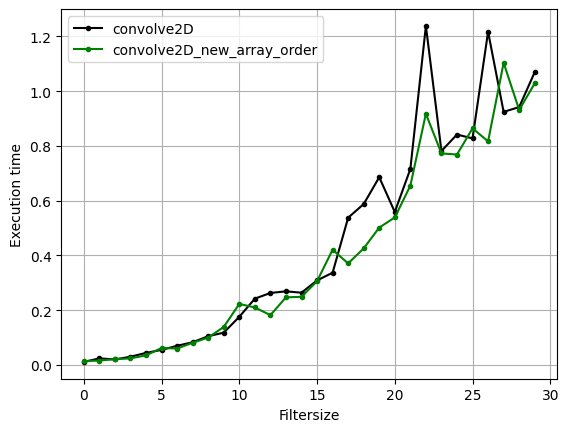

In [26]:
plt.plot(elapsed_time_conv1,'k.-')
plt.plot(elapsed_time_conv2,'g.-')
plt.xlabel('Filtersize')
plt.ylabel('Execution time')
plt.legend(['convolve2D', 'convolve2D_new_array_order'])
plt.grid()


In [27]:
elapsed_time_fft1 = np.zeros([30,1])
elapsed_time_fft2 = np.zeros([30,1])
for i in range(30):
    seed_int =random.randint(0, 1000) # creating random seed values for 20 different datasets
    
    image_data, filter_data, output_data = makeData(N=256, numimg=2, M=1+i, numfilt=3, seed=seed_int) #data with orginal 'makedata' 
    
    image_data2, filter_data2, output_data2 = makeData2(N=256, numimg=2, M=1+i, numfilt=3, seed=seed_int) #data with new  'makedata'  20
    
    
    
    #finding execution time for function c2dfft with orginal array arrangement
    
    st1 =  dt.timestamp(dt.now()) # using datetime's timestam function to create starting point of execution
    O1 = c2dfft(image_data, filter_data, output_data)
    elapsed_time_fft1[i] =  dt.timestamp(dt.now())- st1 # duration of execution
    
    
    #finding execution time for function c2dfft with new array arrangement
    st2 =  dt.timestamp(dt.now())
    O2 = c2dfft_new(image_data2, filter_data2, output_data2)
    elapsed_time_fft2[i] =  dt.timestamp(dt.now())- st2   

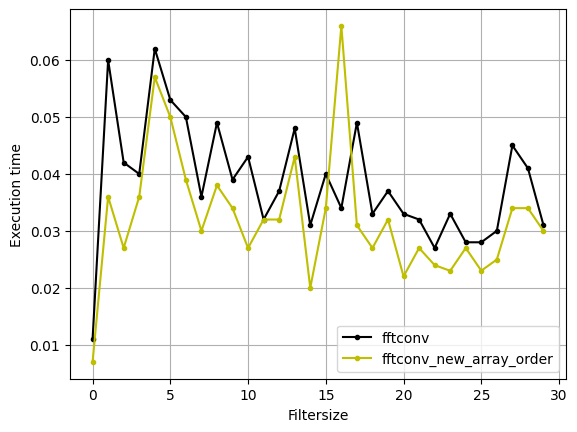

In [28]:
plt.plot(elapsed_time_fft1,'k.-')
plt.plot(elapsed_time_fft2,'y.-')
plt.xlabel('Filtersize')
plt.ylabel('Execution time')
plt.legend(['fftconv', 'fftconv_new_array_order'])
plt.grid()


It seems the ordering of the arrays does not affect execution time that much, but if we take a look at the FFt graph for both the new array arrangement and for theold one, then we will notice that the new array arrangemnt is slightly faster.

If we compare the average for the 30 trials with the 2 different array arranegement, this can be shown

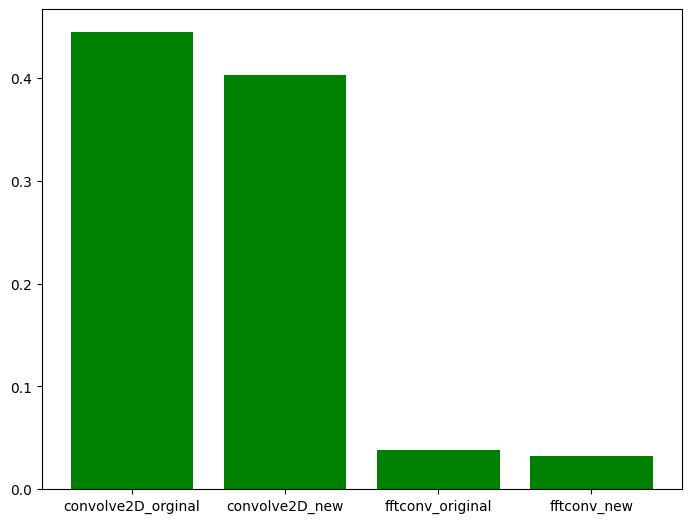

In [37]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
convolver_array_arrangemnt= ['convolve2D_orginal', 'convolve2D_new', 'fftconv_original', 'fftconv_new']
averages = [np.mean(elapsed_time_conv1),np.mean(elapsed_time_conv2),np.mean(elapsed_time_fft1),np.mean(elapsed_time_fft2)]
ax.bar(convolver_array_arrangemnt, averages, color = 'g')
plt.show()

As shown by the averages, the new arrnagemnet has faster avergae excecition time for both convolution methods